# ***Classificação de Maças - Machine Learning Direto ao Ponto***
### **Projeto Complementar e Não Extenso para Classificação da Qualidade das Maças entre Boa ou Ruim (Good, Bad)**
### **Direto ao Ponto porém Documentado**
### **Principais Etapas:**
### **- Rápida Análise Exploratória**
### **- Tratamento de Dados**
### **- Análise Estatística + Visualização de Dados**
### **- Machine Learning - Inicialização de Separação de Dados para Aprendizado dos Algoritmos, Treino, Teste e Validação do Algoritmo**

### **Importando Todas as Bibliotecas para o Projeto**

In [90]:
# Importando Bibliotecas para Análise de Dados, Visualização de Dados, Análise Exploratória, Tratamento de Dados e Manipulação
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns 

# Importando Biblioteca para Mensagens de Aviso para Melhorar a Legibilidade do Código e Suprimir Saídas Desnecessárias
import warnings
warnings.filterwarnings('ignore')

# Importando bibliotecas necessárias de codificadores e barras de progresso para preprocessamento de dados
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
 
# Funções e distribuições estatísticas e escalonamento de recursos
from scipy import stats  
from scipy.stats import norm   
from sklearn.preprocessing import MinMaxScaler   

# Importando a divisão de dados, métricas de avaliação de modelo, validação cruzada, ajuste de hiperparâmetros e desempenho de classificação
from sklearn.model_selection import train_test_split   
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import roc_auc_score  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict  
from sklearn.model_selection import GridSearchCV   
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import RepeatedStratifiedKFold  
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 

# Importando Classificadores para Construir o Machine Learning e Algoritmos 
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC 

## ***Análise Exploratória de Dados***

### **Carregando a Base a Dados e Visualizando Primeiras Linhas**

In [91]:
data = pd.read_csv("apple_quality.csv")

data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


### **Verificando o Número de Linhas e Colunas do Conjunto de Dados**

In [92]:
data.shape

(4001, 9)

### **Obtendo a Soma de Valores Ausentes de Todas as Colunas**

In [93]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

### **Visualizando Brevemente Todas as Colunas**

In [94]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

## ***Tratamento de Dados***

### **Eliminando a Coluna "A_id" que é Desnecesária para o Projeto**

In [95]:
data = data.drop("A_id", axis=1)

### **Verificando Todas as Informações do Conjunto de Dados como Número de Linhas por Coluna, Número de Colunas, Valores das Colunas, entre outros**

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


### **Transfomando a Coluna "Acidity" em Valor Número do Tipo Float, pois ela esta em Tipo Objeto e Usaremos como Coluna Número Posteriormente** 

In [97]:
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')

data.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

### **Novamente Verificando o Número de Linhas e Colunas**

In [98]:
data.shape

(4001, 8)

### **Novamente Obtendo Todas as Colunas Presente no Conjunto Atual**

In [99]:
data.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

### **Novamente Verificando se há Valores Ausentes nas Colunas**

In [100]:
data.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

### **Eliminando Todos os Valores ***Ausentes*** em Todas as Colunas**

In [101]:
data.dropna(inplace=True)

### **Verificando se os Valores Ausentes Foram Eliminados de Fato**

In [102]:
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

### **Visualizando o Conjunto de Dados em Formato Estatístico com sua Contagem de Valores, Média, Desvio Padrão entre Outros** 

In [103]:
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


### **Copiando o Arquivo "data" para uma Variável "data1" para usarmos Posteriormente no Modelo ML**

In [104]:
data1 = data.copy(deep=True)

### **Visualizando a Contagem de Valores da Coluna "Quality"**

In [105]:
data1.Quality.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

### **Verificando a Contagem de Valores Únicos da Coluna "Quality"**

In [106]:
data1.Quality.unique()

array(['good', 'bad'], dtype=object)

### **Verificando em Formeto Estatístico a Coluna "Quality", seus Valores, Tipo dos Valores, entre outros**

In [107]:
data1.Quality.describe()

count     4000
unique       2
top       good
freq      2004
Name: Quality, dtype: object

## ***A Coluna "Quality" é a Nossa Coluna Target, ou seja, Nossa Coluna de Classificação, a que Determina se a Maça esta ou não com uma Qualidade Boa ou Ruim***

### **Substituindo os Valores "good" por 1 e "bad" por 0 na coluna 'Quality' do DataFrame 'data1'.**
### **Em seguida, Contando as Ocorrências de Cada Valor único na Coluna 'Quality'.**

In [108]:
data1.Quality.replace({"good":1, "bad":0}, inplace=True)

data1["Quality"].value_counts()

1    2004
0    1996
Name: Quality, dtype: int64

## ***Análise Estatística - Visualização de Dados***

### **Gerando um Gráfico de Pizza Mostrando a Distribuição Percentual dos Valores da Coluna 'Quality' no DataFrame 'data1'.**
### **Além disso, criando um gráfico de contagem para exibir o número de ocorrências para cada valor de 'Quality'.**

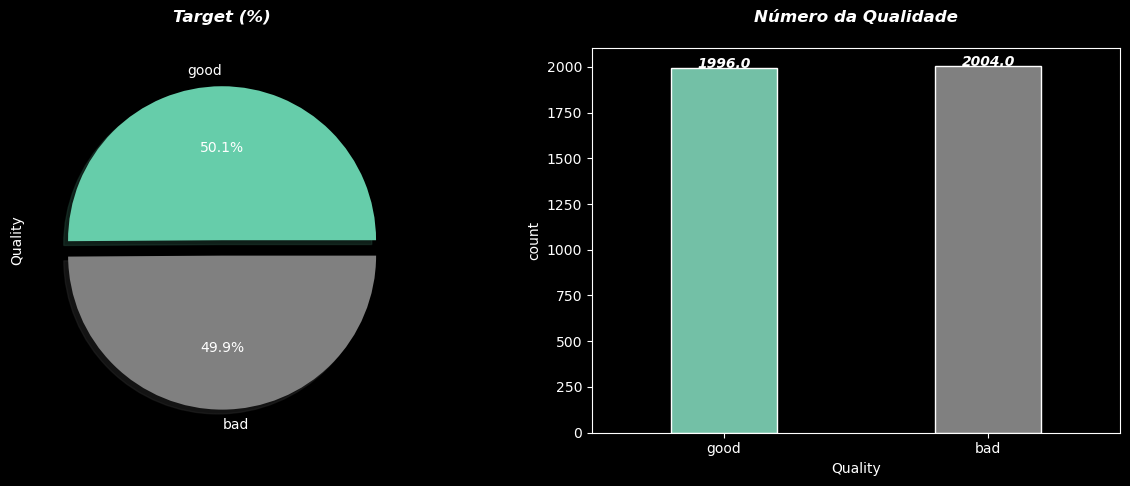

In [109]:
l = data1['Quality'].value_counts()
colors = ['mediumaquamarine', 'gray']
plt.style.use('dark_background')

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
plt.subplot(1,2,1)
l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, labels=['good', 'bad'], colors=colors)
plt.title('Target (%)\n', fontsize=12, fontweight='bold', style='italic')


plt.subplot(1,2,2)
ax = sns.countplot(x='Quality', data=data1, palette=colors, edgecolor='white', width=0.4)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10, fontweight='bold', style='italic')
ax.set_xticklabels(['good', 'bad'])
plt.title('Número da Qualidade\n', fontsize=12, fontweight='bold', style='italic')
plt.show()

### **Criando Subtramas para Exibir a Distribuição de Cada Recurso no DataFrame 'data1'**

In [110]:
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

### **Cada Recurso é Mostrado no Histograma com um Gráfico de Estimativa de Densidade de Kernel (distplot)**

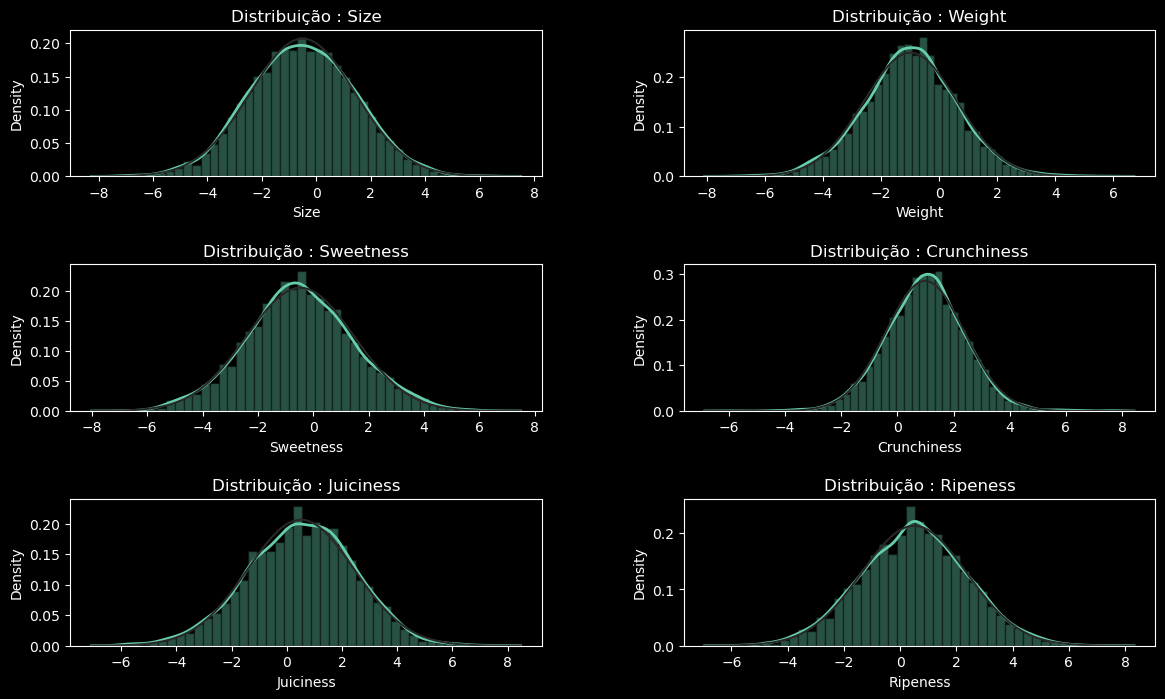

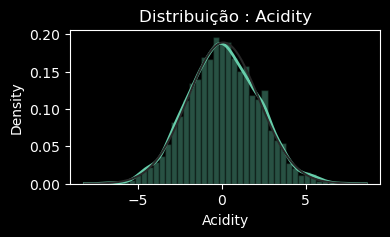

In [117]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.style.use('dark_background')

for i in range(len(features[:6])):
    plt.subplot(3,2,i+1)
    sns.distplot(data1[features[i]], color = 'mediumaquamarine', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2}, fit=norm)
    title = 'Distribuição : ' + features[i]
    plt.title(title)
plt.show()

plt.subplots(figsize=(4,2))
sns.distplot(data1['Acidity'], color = 'mediumaquamarine', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2}, fit=norm)
title = 'Distribuição : Acidity'
plt.title(title)
plt.show()

### **Os Gráficos de Violino Mostram a Distribuição de uma Variável Numérica Dividida por uma Variável Categórica**

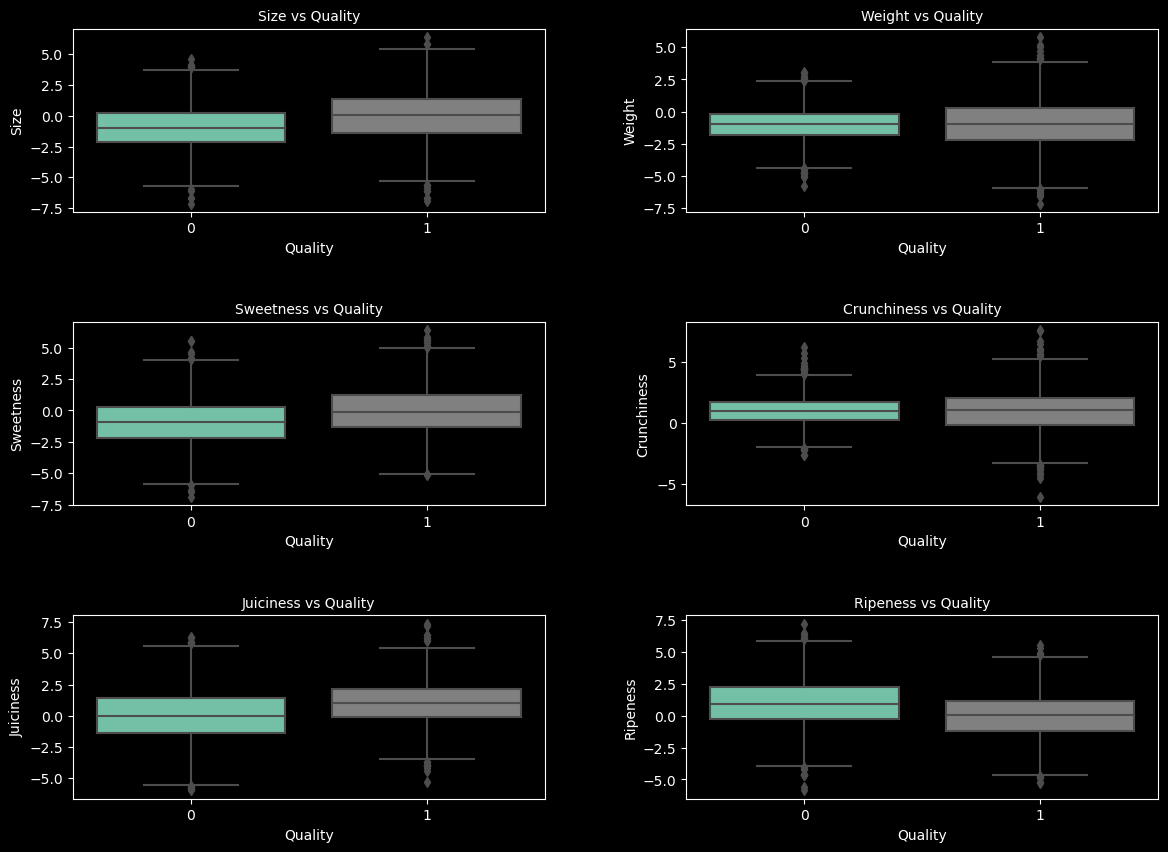

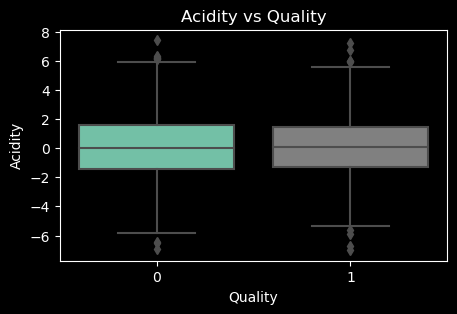

In [118]:
fig, ax = plt.subplots(nrows = 3 ,ncols = 2,figsize = (14,10))
plt.subplots_adjust(wspace=0.3, hspace=0.6)


for i in range(len(features[:6])):
    
    plt.subplot(3,2,i+1)
    ax = sns.boxplot(x = 'Quality',y = features[i],data = data1, palette = colors)
    title = features[i] + ' vs Quality'
    plt.title(title, fontsize=10)
    
plt.show()


plt.subplots(figsize=(5,3))
sns.boxplot(x = 'Quality',y = 'Acidity' ,data = data1, palette = colors)
title = 'Acidity vs Quality'
plt.title(title)
plt.show()

### **Executando a Normalização nas Colunas do DataFrame 'data1' Usando MinMaxScaler**
### **Cada Coluna, Exceto a 'Quality', é Transformada para ter Valores entre 0 e 1**

In [119]:
mms = MinMaxScaler()

for i in data1.drop(columns=['Quality']).columns.to_list():
    data[i] = mms.fit_transform(data1[[i]])
    
data1.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


### **Gerando um Mapa de Calor para Visualizar a Correlação entre Cada Recurso e a Coluna 'Quality' no DataFrame 'data1'**
### **O Mapa de Calor usa Cores para Representar a Força e a Direção da Correlação**
### **Somente Correlações com Valores entre -0,1 e 0,1 são Selecionadas para Exibição**

Text(0.5, 1.0, 'Correlação das Colunas em Relação a "Quality"\n')

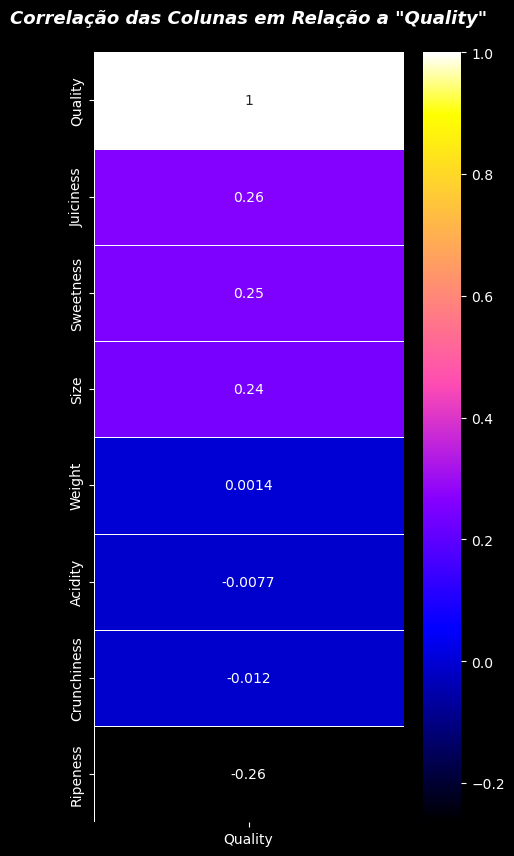

In [122]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(5,10))

corr = data1.corrwith(data1['Quality']).sort_values(ascending=False).to_frame()
corr.columns = ['Quality']
sns.heatmap(corr, annot=True, cmap='gnuplot2', linewidths=0.4, linecolor='white');
plt.title('Correlação das Colunas em Relação a "Quality"\n', fontsize=13, fontweight='bold', style='italic')

### **Eliminando as Colunas que não há Correlação Nenhuma com a Coluna Target "Quality"**

In [123]:
data1.drop(columns=['Weight', 'Acidity', 'Crunchiness'], inplace=True)

## ***Machine Learning***

### **Atribuindo os Recursos (Todas as Colunas Exceto 'Quality') à Variável 'x'**
### **Atribuindo a Variável Alvo 'Quality' à Variável 'y'**

In [124]:
x = data1.drop(columns='Quality')

y = data1['Quality']

### **Dividindo os dados em conjuntos de treinamento e teste**

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

print(x.shape, x_train.shape, x_test.shape)

(4000, 4) (2800, 4) (1200, 4)


## ***PROCESSO IMPORTANTE !!!***

In [126]:
# Definindo uma função para treinar e avaliar um modelo classificador de aprendizado de máquina
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))



# Definindo uma função para avaliar o desempenho de um modelo classificador de aprendizado de máquina
def model_evaluation(classifier,x_test,y_test):

    # Matrix de Confusão
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classificação Report
    print(classification_report(y_test,classifier.predict(x_test)))





# Definindo uma função para traçar a curva Receiver Operating Characteristic (ROC)
def plot_roc_curve(y_true, y_scores):
    # Calculando a taxa de falsos positivos (FPR) e a taxa de verdadeiros positivos (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Calculando a área sob a curva ROC (AUC)
    auc = roc_auc_score(y_true, y_scores)

    # Plotando a Curva ROC
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal (classificador aleatório)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Características Operacionais do Receptor (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [127]:
# Inicializando um classificador XGBoost com hiperparâmetros específicos

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  87.42%
ROC_AUC Score :  78.12%
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       608
           1       0.76      0.81      0.78       592

    accuracy                           0.78      1200
   macro avg       0.78      0.78      0.78      1200
weighted avg       0.78      0.78      0.78      1200



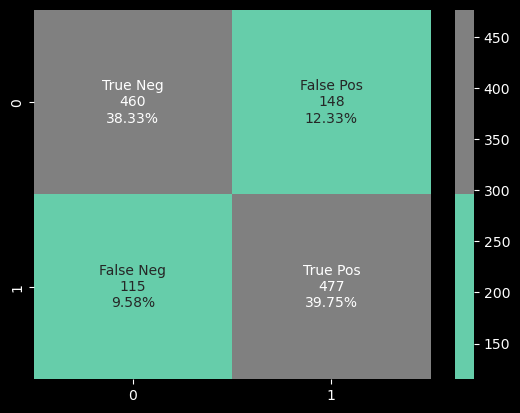

In [128]:
# Treinando e avaliando o desempenho de um modelo classificador XGBoost

model(classifier_xgb,x_train,y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

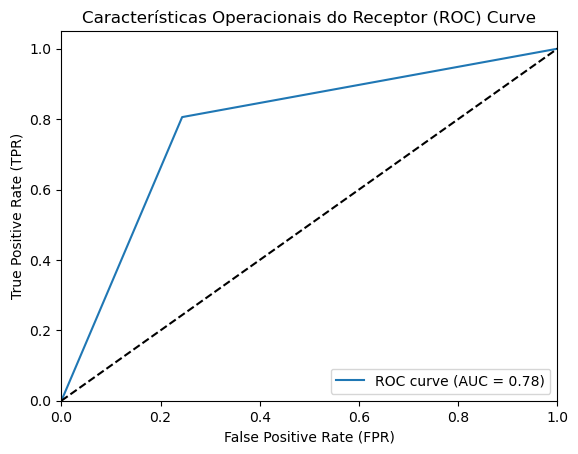

In [131]:
# Fazendo previsões usando o classificador XGBoost (XGB) e traçando a curva ROC

plt.style.use('default')
prediction_xgb = classifier_xgb.predict(x_test)
plot_roc_curve(y_test, prediction_xgb)

In [132]:
# Inicializando um classificador de vetores de suporte (SVC) com hiperparâmetros específicos

classifier_svc = SVC(kernel = 'linear',C = 0.1)

Cross Validation Score :  79.37%
ROC_AUC Score :  71.08%
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       608
           1       0.71      0.71      0.71       592

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200



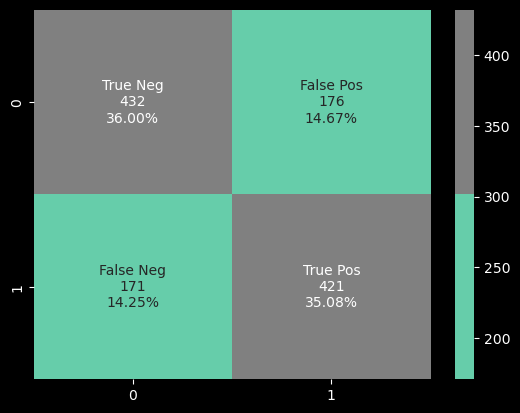

In [134]:
# Treinando e avaliando o desempenho de um modelo classificador de vetores de suporte (SVC)
plt.style.use('dark_background')
model(classifier_svc,x_train,y_train,x_test,y_test)
model_evaluation(classifier_svc,x_test,y_test)

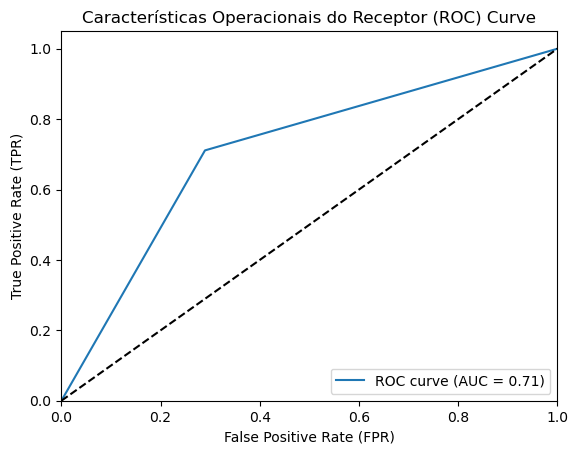

In [135]:
# Fazendo previsões usando o classificador de vetores de suporte (SVC) e traçando a curva ROC

plt.style.use('default')
prediction_svc = classifier_svc.predict(x_test)
plot_roc_curve(y_test, prediction_svc)

In [136]:
# Inicializando um classificador K-Nearest Neighbours com hiperparâmetros específicos

classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Cross Validation Score :  85.47%
ROC_AUC Score :  76.70%
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       608
           1       0.75      0.79      0.77       592

    accuracy                           0.77      1200
   macro avg       0.77      0.77      0.77      1200
weighted avg       0.77      0.77      0.77      1200



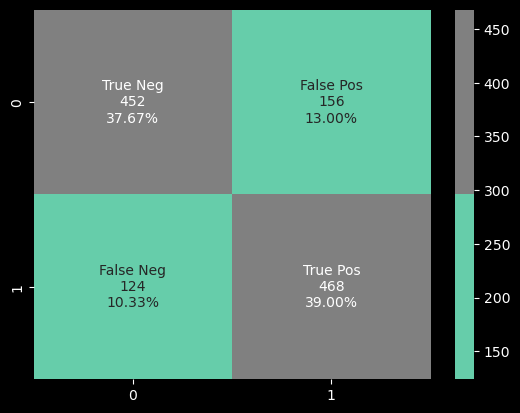

In [137]:
# Treinando e avaliando o desempenho de um modelo classificador K-Nearest Neighbors (KNN)
plt.style.use('dark_background')
model(classifier_knn,x_train,y_train,x_test,y_test)
model_evaluation(classifier_knn,x_test,y_test)

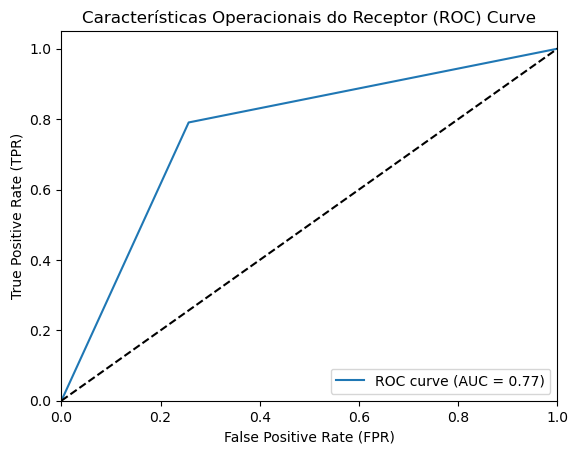

In [138]:
# Fazendo previsões usando o classificador K-Nearest Neighbors (KNN) e traçando a curva ROC
plt.style.use('default')
prediction_knn = classifier_knn.predict(x_test)
plot_roc_curve(y_test, prediction_knn)

In [139]:
# Inicializando um classificador Random Forest com hiperparâmetros específicos

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  85.45%
ROC_AUC Score :  77.94%
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       608
           1       0.73      0.86      0.79       592

    accuracy                           0.78      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.78      0.78      1200



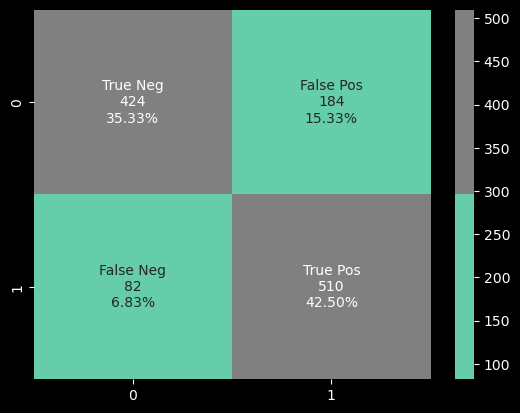

In [140]:
# Treinando e avaliando o desempenho de um modelo Random Forest Classifier
plt.style.use('dark_background')
model(classifier_rf,x_train,y_train,x_test,y_test)
model_evaluation(classifier_rf,x_test,y_test)

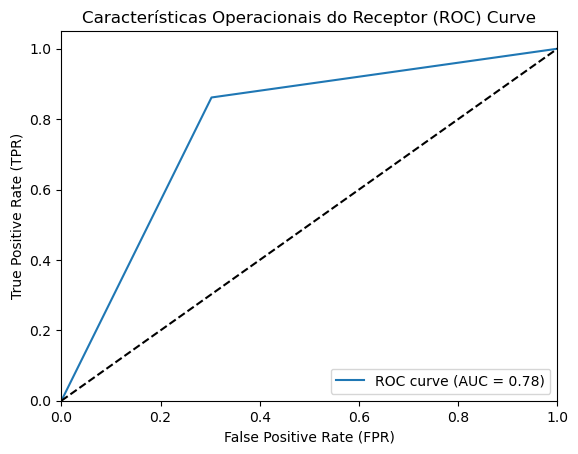

In [141]:
# Fazendo previsões usando o Random Forest Classifier e traçando a curva ROC
plt.style.use('default')
prediction_rf = classifier_rf.predict(x_test)
plot_roc_curve(y_test, prediction_rf)

# ***Resultados por Modelo/Algoritmo:***
### **XGBoost = 87.44% (Validação Cruzada) | 77.78% (ROC Acurácia)**
### **Support Vector Machine = 78.93% (Validação Cruzada) | 71.10% (ROC Acurácia)**
### **Regressão KNN = 85.62% (Validação Cruzada) | 76.45% (ROC Acurácia)**
### **Random Forest = 85.45% (Validação Cruzada) | 77.94% (ROC Acurácia)**

# ***Fim***